<a href="https://colab.research.google.com/github/roy2392/breast_cancer_classification/blob/main/Breast_Cancer_Classification_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

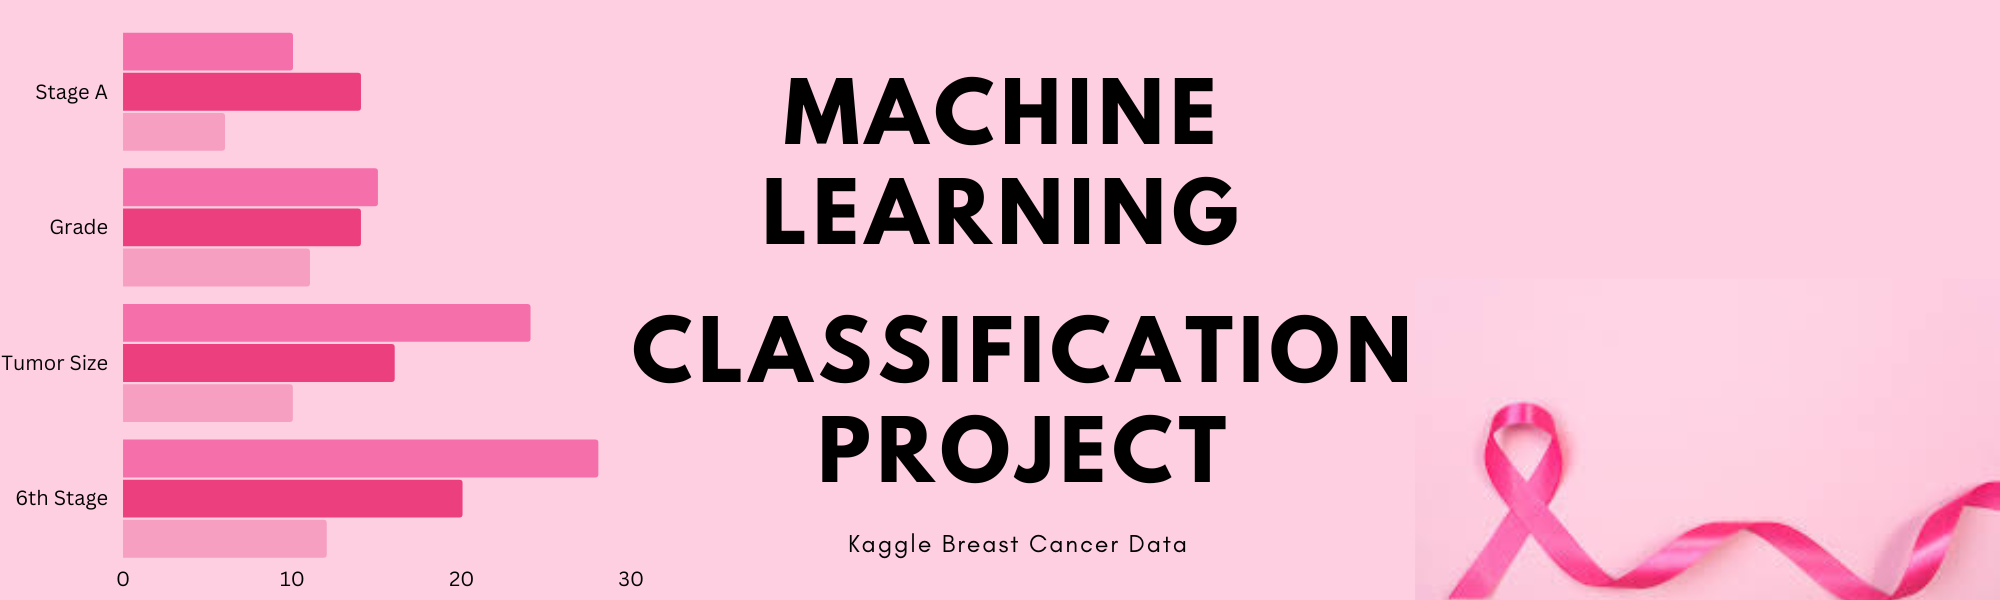

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

import warnings
%matplotlib inline

# importing & merging the data

In [2]:
#import Kaggle API
# %pip install kaggle

In [3]:
#in case of using google colab
# #upload you kaggle api token (under profil >> settings >> API >> Create nEW Token) 
# from google.colab import files

# uploaded = files.upload()

In [4]:
#import the  dataset from kaggle via api
# !kaggle datasets download -d reihanenamdari/breast-cancer

In [5]:
#unzip the dataset zip file 
# !unzip breast-cancer.zip

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df_copy = df.copy()

# Visualization of the data


## All features Histograms

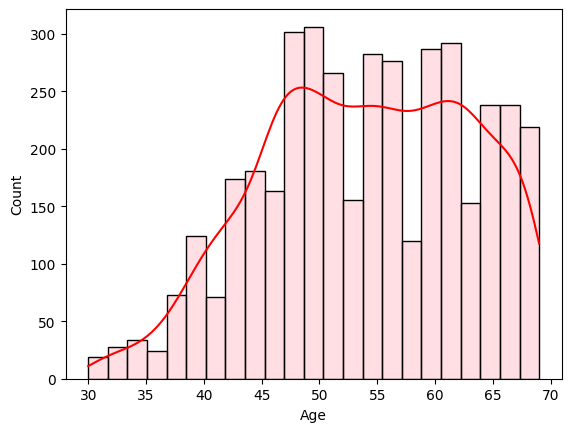

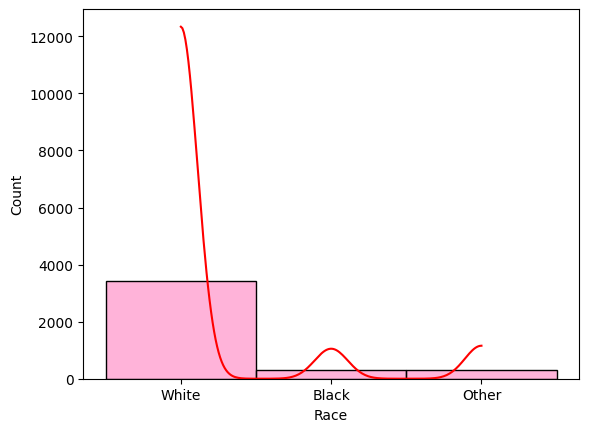

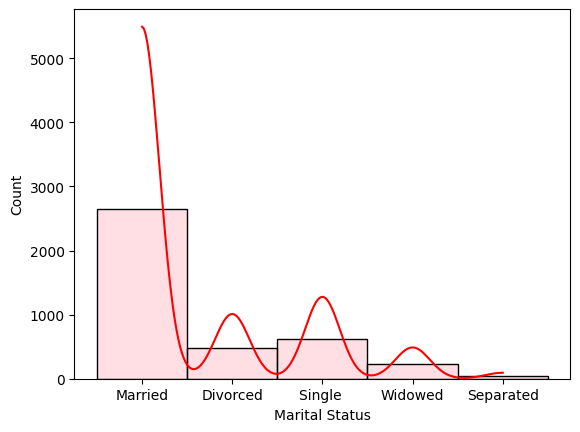

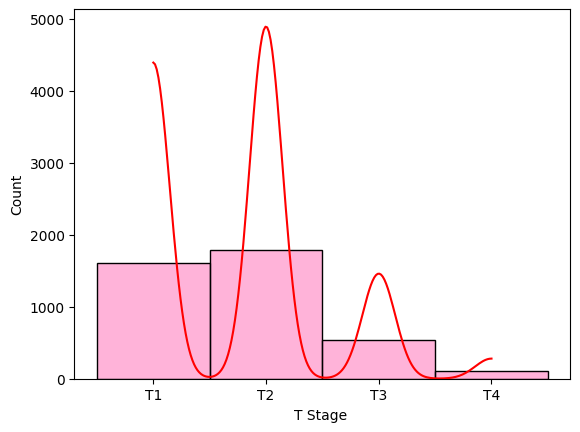

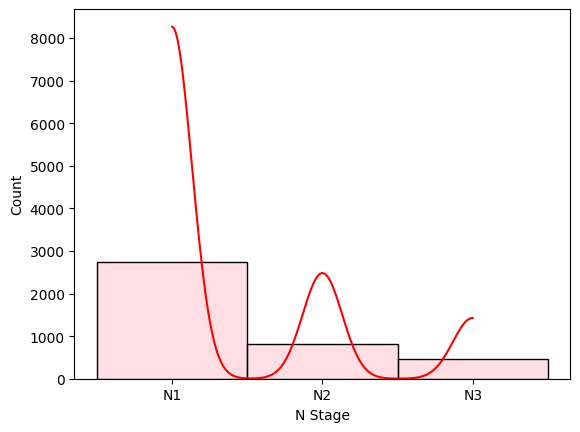

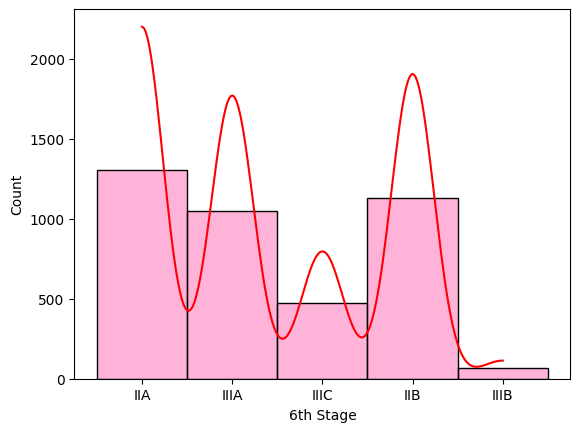

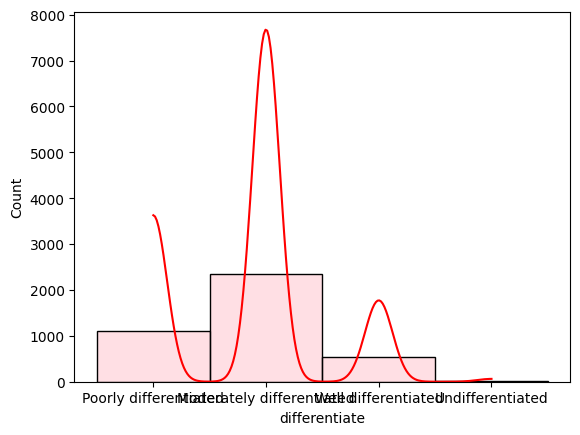

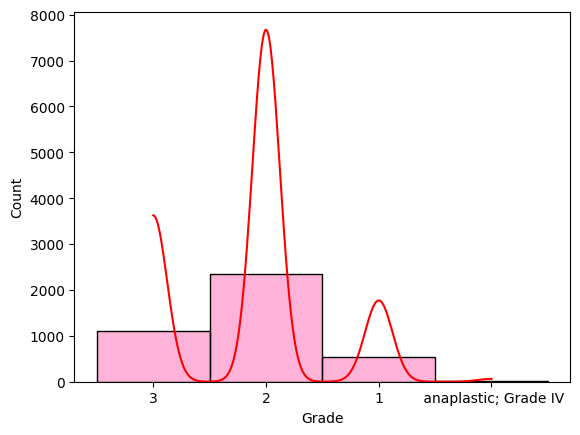

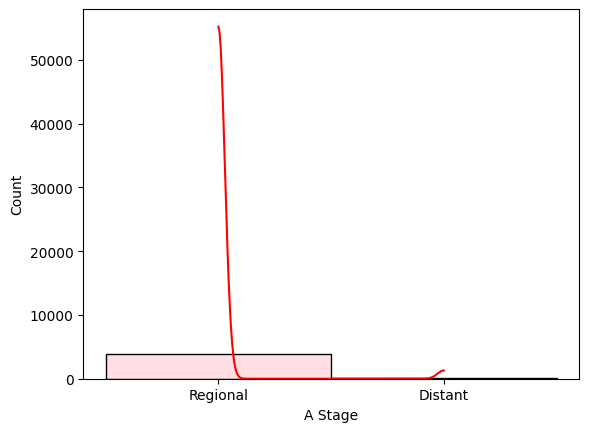

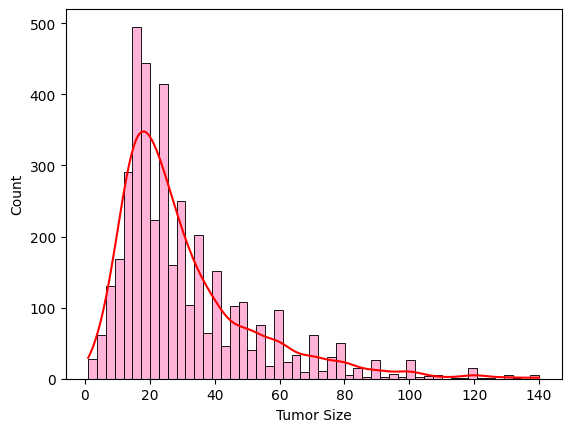

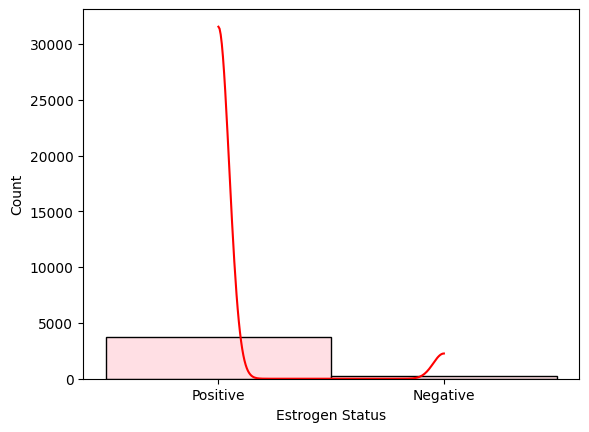

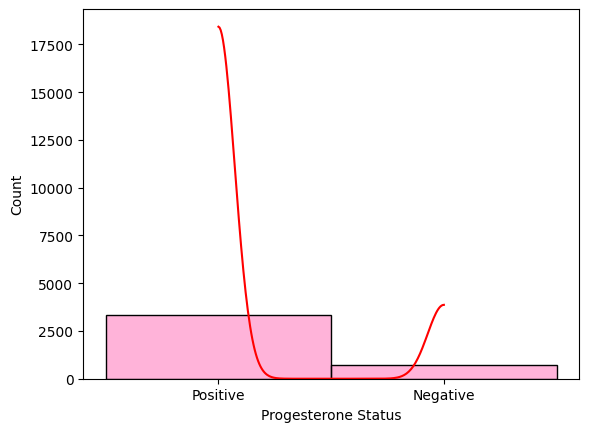

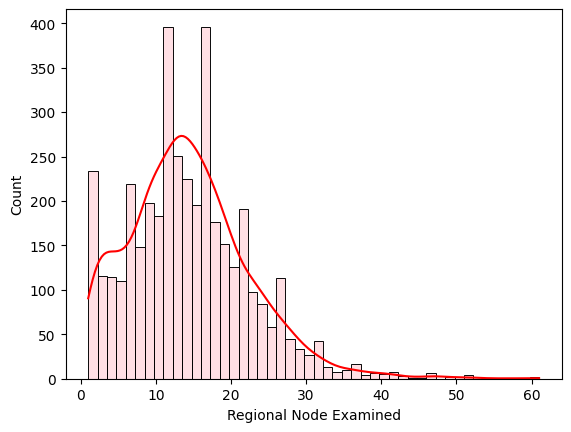

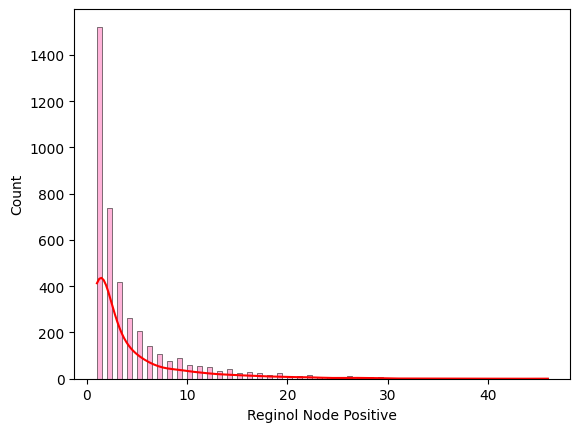

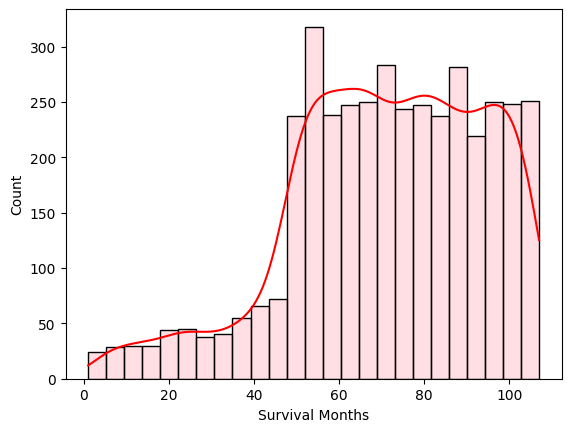

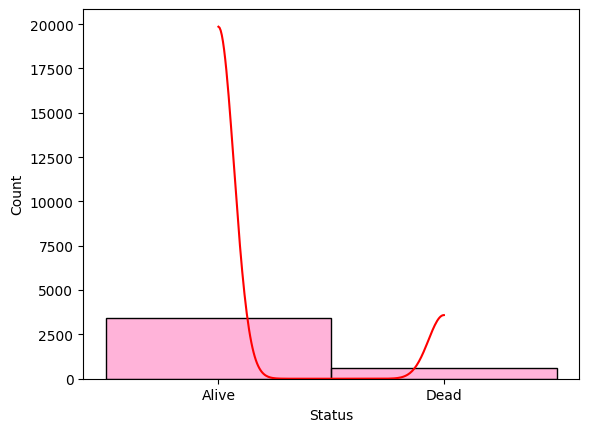

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#FFC0CB', '#FF69B4']  # Pinkish colors

for i, column in enumerate(df.columns):
    ax = sns.histplot(df, x=column, kde=True, color=colors[i % len(colors)])
    ax.lines[0].set_color("red")
    plt.show()

## Features Corrleations

In [8]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr().round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.080000,-0.030000,0.010000,-0.010000
Tumor Size,-0.080000,1.000000,0.100000,0.240000,-0.090000
Regional Node Examined,-0.030000,0.100000,1.000000,0.410000,-0.020000
Reginol Node Positive,0.010000,0.240000,0.410000,1.000000,-0.140000
Survival Months,-0.010000,-0.090000,-0.020000,-0.140000,1.000000


<span style="color:green">It doesnt seem like there's any significant correlation in the numberical features </span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [10]:
for i in df.columns: print(i, "  ",df[i].unique())

Age    [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
Race    ['White' 'Black' 'Other']
Marital Status    ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage     ['T1' 'T2' 'T3' 'T4']
N Stage    ['N1' 'N2' 'N3']
6th Stage    ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate    ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade    ['3' '2' '1' ' anaplastic; Grade IV']
A Stage    ['Regional' 'Distant']
Tumor Size    [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  6

# add features

In [11]:
def cancer_encode(df):
    data_encoder = preprocessing.OrdinalEncoder(categories = [['T1','T2','T3','T4'],['N1','N2','N3'],['IIA','IIB','IIIA','IIIB','IIIC'],
                                                         ['1','2','3',' anaplastic; Grade IV'],['Regional','Distant'],
                                                         ['Negative','Positive'],['Negative','Positive'],['Alive','Dead']])
    df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']] = data_encoder.fit_transform(df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']].values.reshape(-8, 8))
    df.Grade = df.Grade+1
       
    cat_var = ['Race','Marital Status']
    one_hot = OneHotEncoder(sparse=False)#, drop = 'first')
    encoder_var_array = one_hot.fit_transform(df[cat_var])
    encoder_name = one_hot.get_feature_names_out(cat_var)
    encoder_vars_df = pd.DataFrame(encoder_var_array,columns=encoder_name)
    df = pd.concat([df,encoder_vars_df],axis=1)

    return df

def cancer_features_select(df):
    df['Regional_Node_pos_%'] = 100*df['Reginol Node Positive']/df['Regional Node Examined']
    df.drop(['Race', 'Marital Status','Survival Months', 'Status'],axis=1, inplace=True)
    return df

cancer_encoder = FunctionTransformer(cancer_encode, validate=False)
cancer_features_selector = FunctionTransformer(cancer_features_select, validate=False)

In [12]:
df = cancer_encode(df)
df = cancer_features_select(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   int64  
 1   T Stage                   4024 non-null   float64
 2   N Stage                   4024 non-null   float64
 3   6th Stage                 4024 non-null   float64
 4   differentiate             4024 non-null   object 
 5   Grade                     4024 non-null   float64
 6   A Stage                   4024 non-null   float64
 7   Tumor Size                4024 non-null   int64  
 8   Estrogen Status           4024 non-null   float64
 9   Progesterone Status       4024 non-null   float64
 10  Regional Node Examined    4024 non-null   int64  
 11  Reginol Node Positive     4024 non-null   int64  
 12  Race_Black                4024 non-null   float64
 13  Race_Other                4024 non-null   float64
 14  Race_Whi

In [14]:
df['Regional_Node_pos_%'] = 100*df['Reginol Node Positive']/df['Regional Node Examined']

## Convert Categorical features to numbrical 


<span style="color:green">categorical variable: Status,Estrogen Status,Progesterone Status,T Stage,N Stage,6th Stage,differentiate,Grade,Race.
 </span>

In [15]:
data_encoder = preprocessing.OrdinalEncoder(categories = [['T1','T2','T3','T4'],['N1','N2','N3'],['IIA','IIB','IIIA','IIIB','IIIC'],
                                                         ['1','2','3',' anaplastic; Grade IV'],['Regional','Distant'],
                                                         ['Negative','Positive'],['Negative','Positive'],['Alive','Dead']])


In [16]:
df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status']] = data_encoder.fit_transform(df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status']].values.reshape(-8, 8))

ValueError: could not convert string to float: 'T1'

In [17]:
df.Grade = df.Grade+1

## Convert categorical data into binary features 

In [18]:
from sklearn.preprocessing import OneHotEncoder
cat_var = ['Race','Marital Status']
one_hot = OneHotEncoder(sparse=False)#, drop = 'first')
encoder_var_array = one_hot.fit_transform(df[cat_var])
encoder_name = one_hot.get_feature_names_out(cat_var)
encoder_vars_df = pd.DataFrame(encoder_var_array,columns=encoder_name)
df = pd.concat([df,encoder_vars_df],axis=1)
#df.drop(cat_var,axis=1, inplace=True)

KeyError: "None of [Index(['Race', 'Marital Status'], dtype='object')] are in the [columns]"

In [ ]:
df.columns

In [ ]:

df.drop(['Race', 'Marital Status','Survival Months', 'Status'],axis=1, inplace=True)

In [19]:
data_encoder.categories_

[]

## Correlation - Again

In [20]:
corr_matrix = df.corr()[['Grade','A Stage']].round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

ValueError: could not convert string to float: 'Poorly differentiated'


<span style="color:green">now we can analyze correlation with the categorial features as well. It still doesnt show any significant correlation
 </span>


<span style="color:green">after converting the grade to numberical values, lets examine the distribution
 </span>

<Axes: xlabel='Grade'>

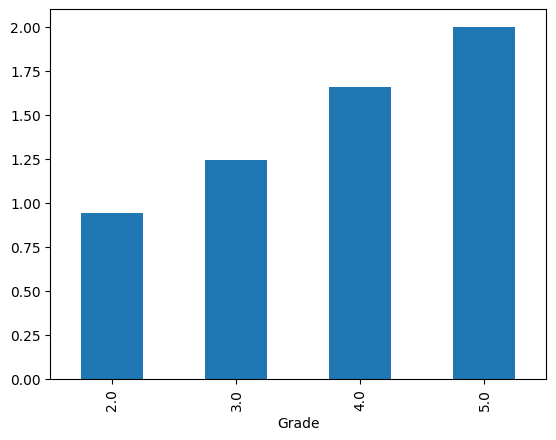

In [21]:
df.groupby(['Grade'])['6th Stage'].mean().plot.bar()

In [1]:
df.groupby(['A Stage'])['6th Stage'].count().plot.bar()

NameError: name 'df' is not defined

<Axes: >

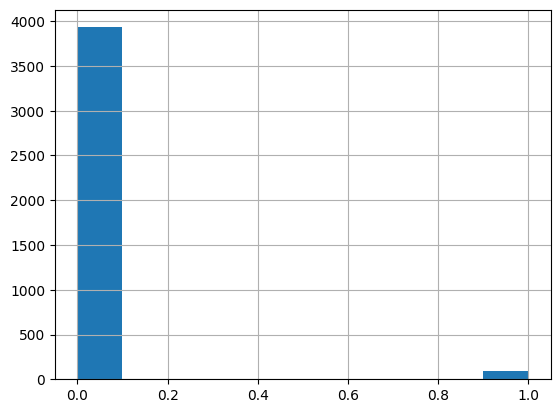

In [23]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(1, 3, 1)
ax1 = df2.groupby('Bin_Holiday')['Total'].mean().plot.bar(figsize=(10, 7))
for index,data in enumerate(df2.groupby('Bin_Holiday')['Total'].mean()):
    ax1.text(x=index-0.1 , y =data+1 , s=f"{round(data)}" , fontdict=dict(fontsize=15))
ax1.set_title("Mean total sale")


df['A Stage'].hist()

<Axes: >

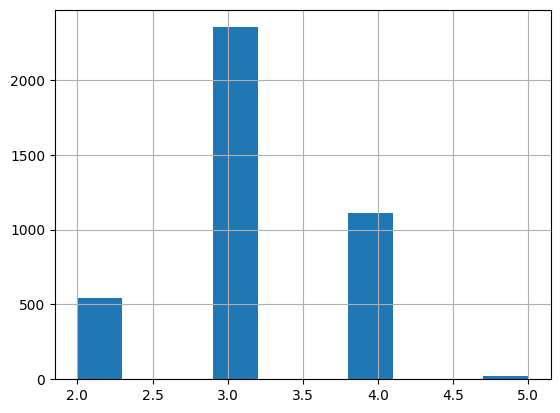

In [24]:
df.Grade.hist()

<Axes: title={'center': '6th Stage'}, xlabel='Grade'>

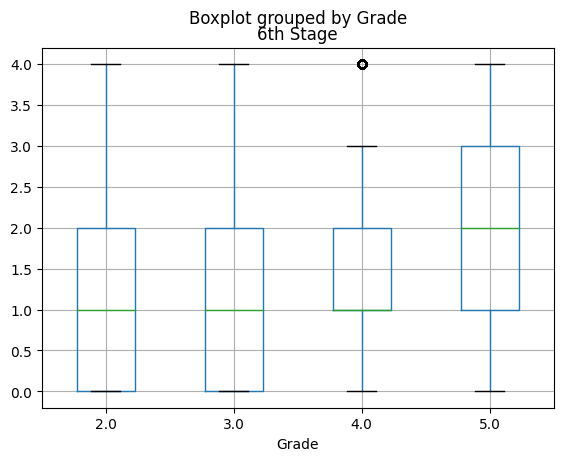

In [25]:
df.boxplot('6th Stage','Grade')


# race and a stage and Grade

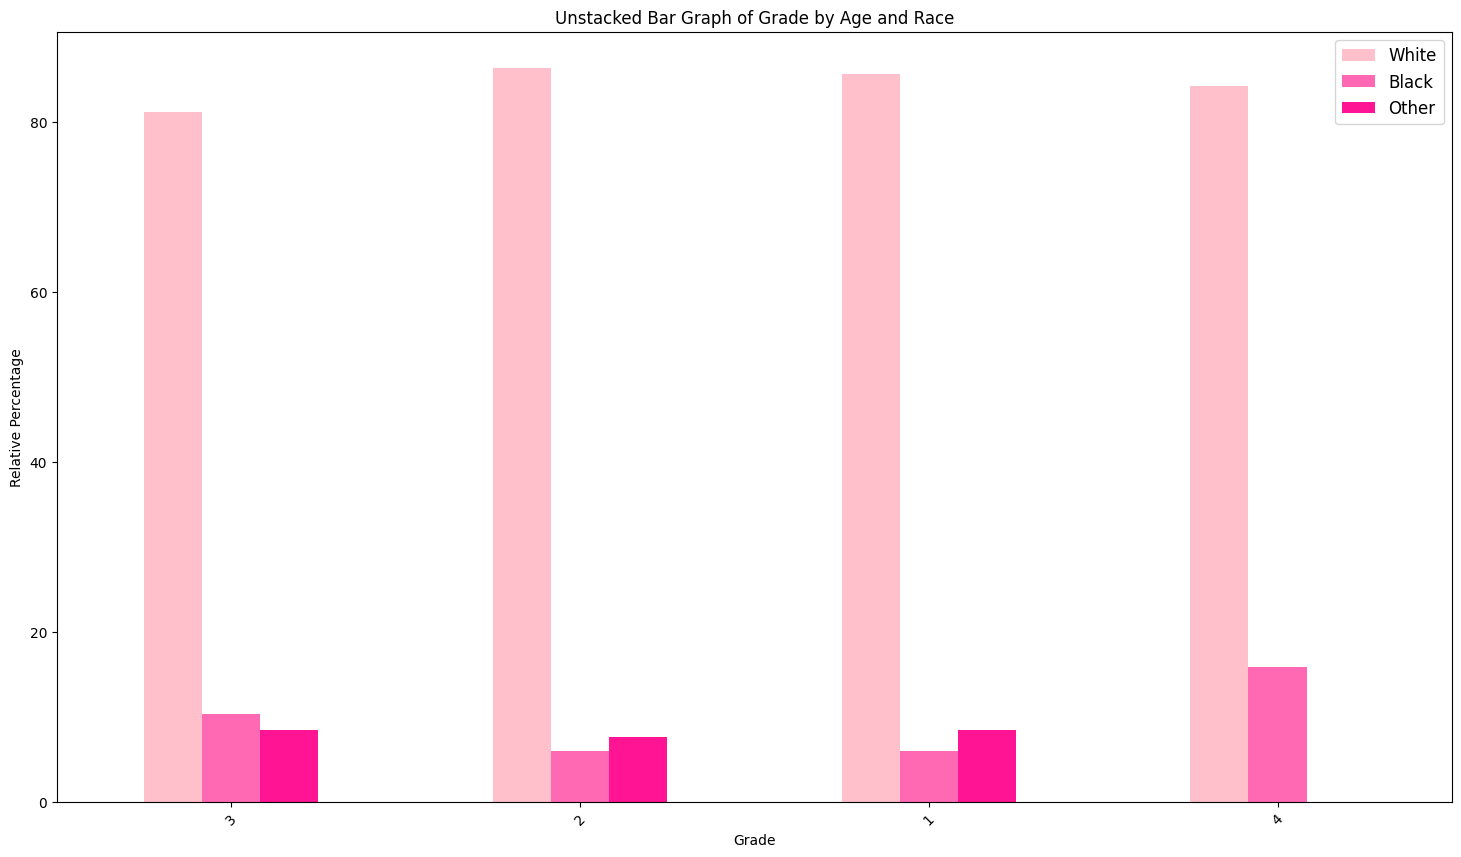

In [36]:
# Change the value 'anaplastic; Grade IV' to 4 in the 'Grade' column
df_copy['Grade'] = df_copy['Grade'].replace(' anaplastic; Grade IV', 4)

# Set the pinkish colors
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors

# Group by 'Grade' and 'Race' and count the rows, specifying the desired order
grouped_df = df_copy.groupby(['Grade', 'Race'], sort=False)['Age'].count().unstack().fillna(0)

# Calculate the relative percentages within each grade
relative_percentages = grouped_df.apply(lambda x: 100 * x / x.sum(), axis=1)


# Plot the unstacked bar graph
ax = relative_percentages.plot.bar(color=colors)

# Set the style and labels for the plot
plt.rcParams['figure.figsize'] = (18, 10)  # Adjust the figure size as desired
plt.xlabel('Grade')
plt.ylabel('Relative Percentage')
plt.title('Unstacked Bar Graph of Grade by Age and Race')
plt.legend(loc='upper right', fontsize='large')

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

<span style="color:green"> While white people have more patients in grade 2, black people have more patient in grade 3 </span>

<span style="color:green"> <b> we assume, white people are more likely to been examined in early stages and that's why there are more white females in stage 2
according to the Breast Cancer Foundation by Susan G Komen, "mong younger women, Black and non-Hispanic Black women have higher rates of breast cancer compared to white and non-Hispanic white women." </b>  </span>

link: https://www.komen.org/breast-cancer/risk-factor/race-ethnicity/#:~:text=Rates%20of%20breast%20cancer%20in,2.3%20below)%20%5B333%5D.

## what is the distribution of women pateints for each race?

In [27]:
df.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Race_Black',
       'Race_Other', 'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed',
       'Regional_Node_pos_%'],
      dtype='object')

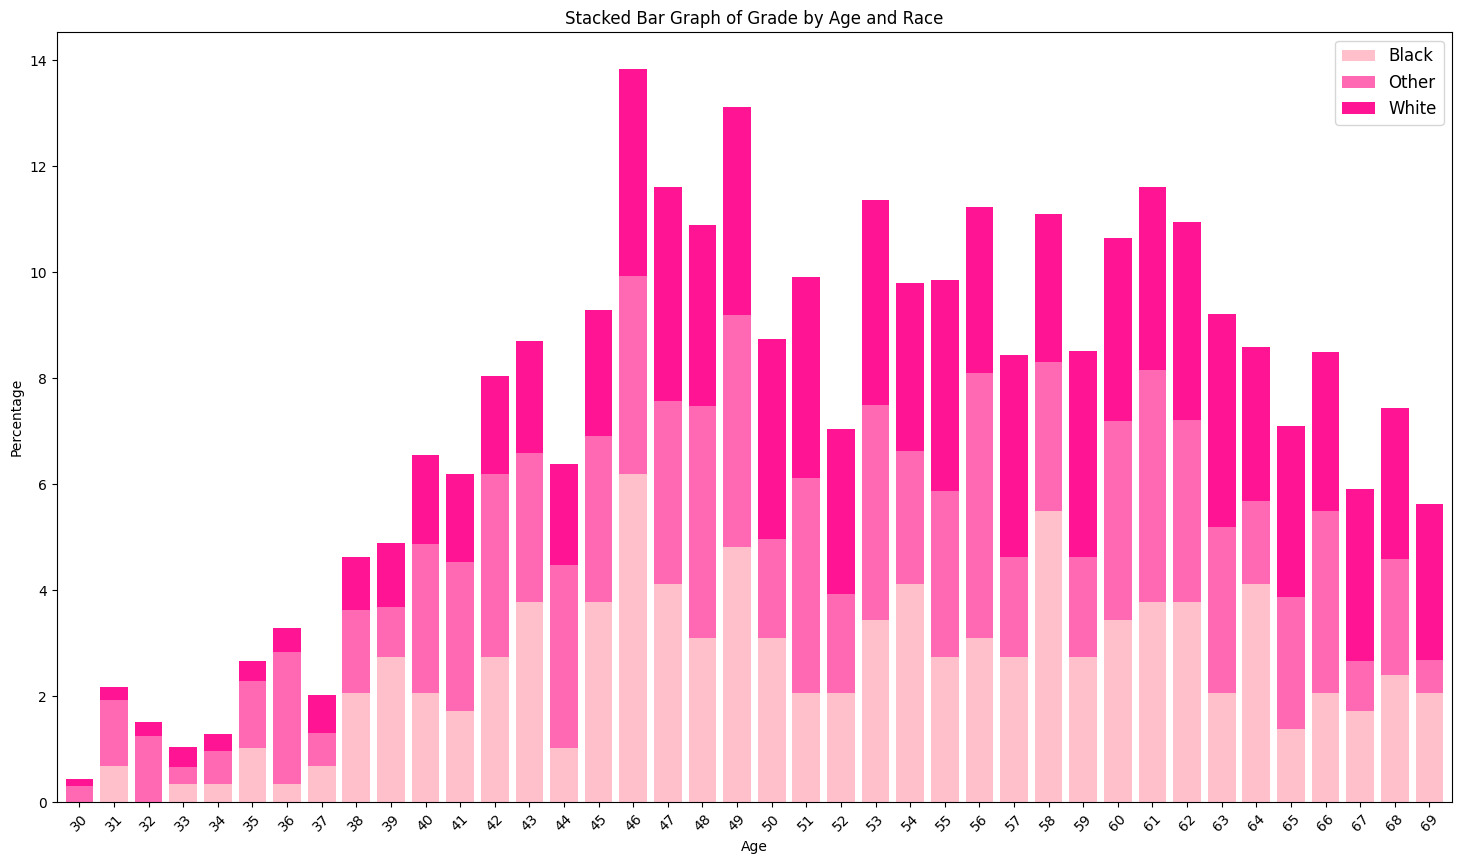

In [28]:
# Group by 'Age' and 'Race' and count the occurrences of 'Grade'
grouped_df = df_copy.groupby(['Age', 'Race'])['Grade'].count().unstack().fillna(0)

# Calculate the relative percentages within each age group
relative_percentages = grouped_df.apply(lambda x: 100 * x / x.sum())

# Set the width and colors for the bars
width = 0.8  # Adjust the width as desired
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors

# Plot the stacked bar graph
ax = relative_percentages.plot.bar(stacked=True, color=colors, width=width)

# Set the style and labels for the plot
plt.rcParams['figure.figsize'] = (18, 10)  # Adjust the figure size as desired
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Stacked Bar Graph of Grade by Age and Race')
plt.legend(loc='upper right',fontsize='large')

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

<span style="color:green"> Before our analysis we reaerch about the distribution of the disease in women by ages. we expected to have a greater precenatge of older women in the blakc community and greater precantge of young white females. our data tells us diffrently. our  client might gave us data which is not representive.</b> </span>

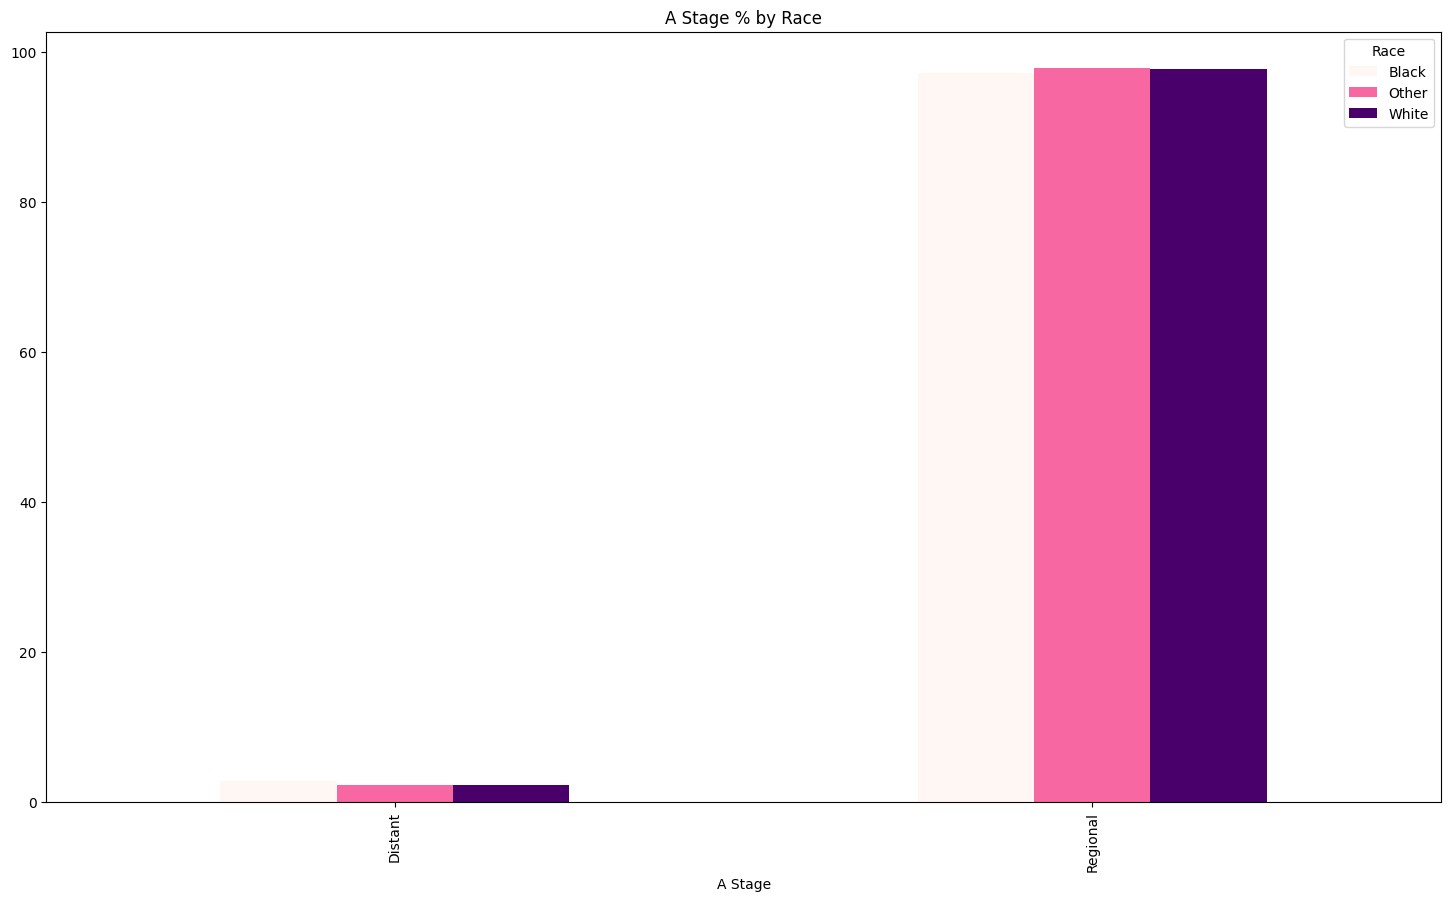

In [69]:
data = df_copy.groupby(['A Stage', 'Race'])['Age'].count().unstack().fillna(0)
data_percent = data.transform(lambda x: (100 * x / sum(x)))

# Define the colormap
cmap = plt.cm.get_cmap('RdPu')

# Generate a range of colors based on the number of races
colors = [cmap(i) for i in np.linspace(0, 1, len(data.columns))]

# Create the bar plot with pinkish colors
data_percent.plot.bar(color=colors)

# Set the title and font size
plt.title('A Stage % by Race', fontsize=12)

# Show the plot
plt.show()

# marital status and a stage and Grade

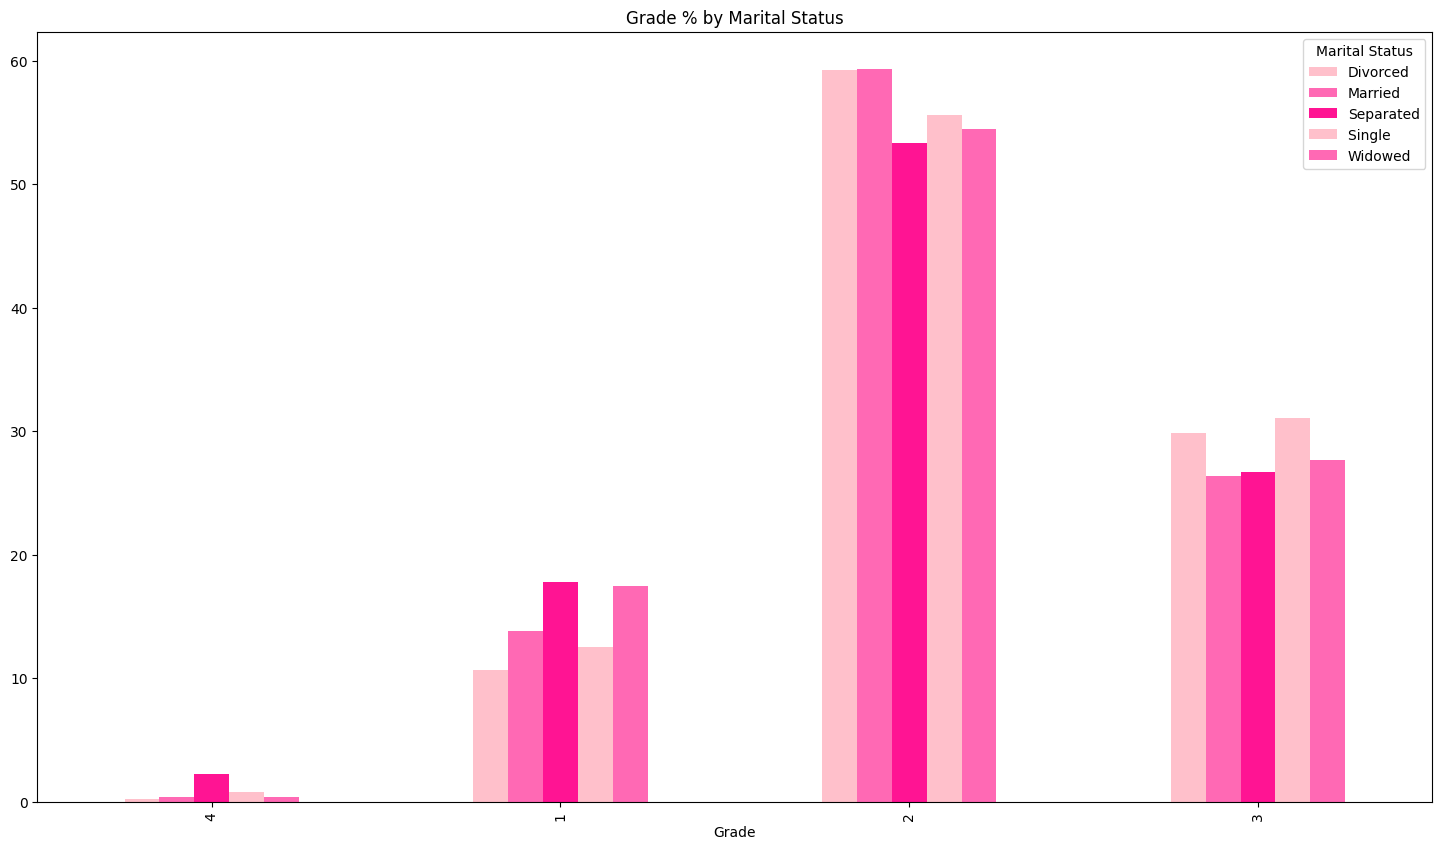

In [73]:
data = df_copy.groupby(['Grade', 'Marital Status'])['Age'].count().unstack().fillna(0)
data_percent = data.transform(lambda x: (100 * x / sum(x)))
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors
# Create the bar plot with pink color
data_percent.plot.bar(color= colors)  # Pinkish colors)

# Set the title and font size
plt.title('Grade % by Marital Status', fontsize=12)

# Show the plot
plt.show()

<span style="color:green"> Overall It seems that a married womwn are not less likely to develop a higher grade of breast cancer. after our research, it has mention in the literature that like most of illness a support system is alway a good idea. we do see a spike of single women in the 3rd stage. </b> </span>

link to the article: https://www.sciencedirect.com/science/article/abs/pii/S0960977616302685

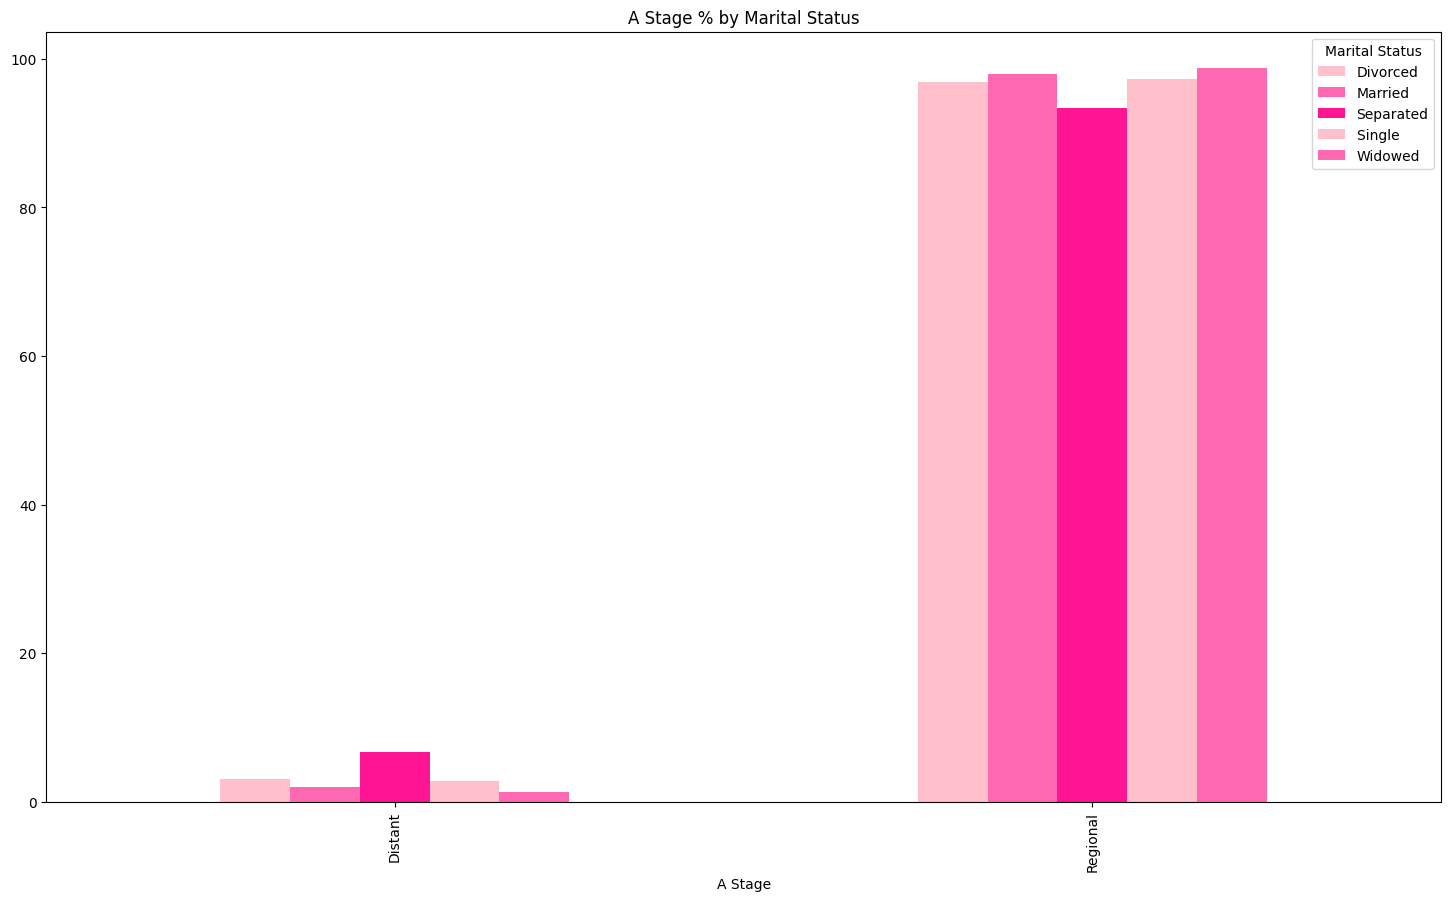

In [77]:
data = df_copy.groupby(['A Stage', 'Marital Status'])['Age'].count().unstack().fillna(0)
data_percent = data.transform(lambda x: (100 * x / sum(x)))

# Define the colormap
cmap = plt.cm.get_cmap('RdPu')

# Generate a range of colors based on the number of A Stages
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors

# Create the bar plot with pinkish colors
data_percent.plot.bar(color=colors)

# Set the title and font size
plt.title('A Stage % by Marital Status', fontsize=12)

# Show the plot
plt.show()

In [39]:
df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T

Grade,2.0,3.0,4.0,5.0
6th Stage,,,,
0.0,19.080460,61.379310,19.233716,0.306513
1.0,13.362832,58.672566,27.787611,0.176991
2.0,9.714286,59.523810,30.000000,0.761905
3.0,11.940299,52.238806,35.820896,0.000000
4.0,6.991525,48.093220,43.855932,1.059322


In [ ]:

fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and 6th stage %, normelize by 6thstage', fontsize=12)


In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','T Stage '])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and T stage, normelize by T stage', fontsize=12)


ניתן לראות שבשלב ת' 0 ו3 יש הבדלים משמעותיים בהתפלגות הגרייד, בפרט בחלוקה בין 2 ל3

Text(0.5, 1.0, 'Grade and N stage, normelize by N stage')

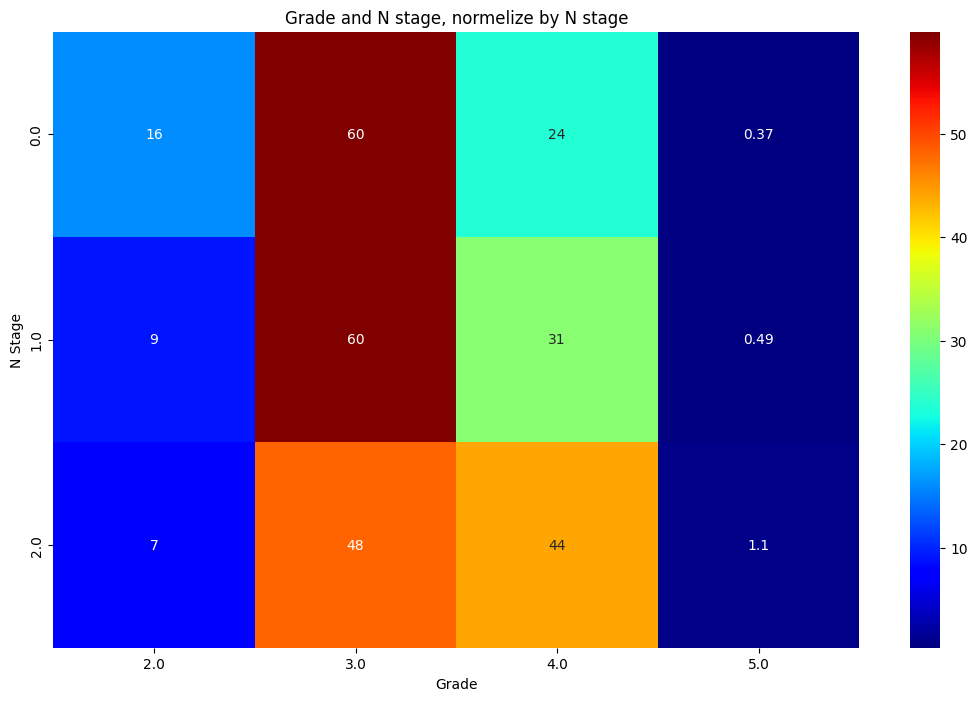

In [41]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','N Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and N stage, normelize by N stage', fontsize=12)


## Estrogen & Progresterone status 

<span style="color:green"> We adviced with medical proffesional, to understand why those features are mention. we been told that normal cells have receptors for thos hormones. the Estrogen & Progesterone indications are examine wheter or not the cell receptors are infected. <b> Therfore we would expect those features to increase as the Grade feature increases</b> </b> </span>

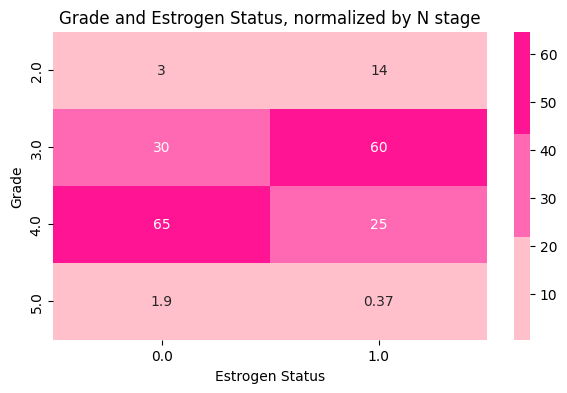

In [54]:
# Set the pinkish colors
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Generate the heatmap
sns.heatmap(ax=ax, data=df.groupby(['Grade', 'Estrogen Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))),
            cmap=sns.color_palette(colors), annot=True)

# Set the title
plt.title(label='Grade and Estrogen Status, normalized by N stage', fontsize=12)

# Show the plot
plt.show()

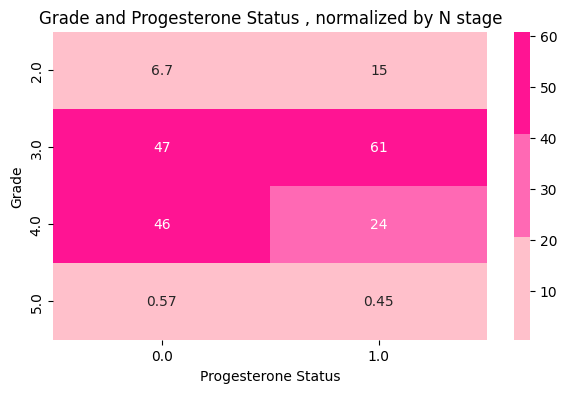

In [55]:
# Set the pinkish colors
colors = ['#FFC0CB', '#FF69B4', '#FF1493']  # Pinkish colors

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Generate the heatmap
sns.heatmap(ax=ax, data=df.groupby(['Grade', 'Progesterone Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))),
            cmap=sns.color_palette(colors), annot=True)

# Set the title
plt.title(label='Grade and Progesterone Status , normalized by N stage', fontsize=12)

# Show the plot
plt.show()


In [56]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,...,Reginol Node Positive,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,Regional_Node_pos_%
0,68,0.0,0.0,0.0,Poorly differentiated,4.0,0.0,4,1.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.166667
1,50,1.0,1.0,2.0,Moderately differentiated,3.0,0.0,35,1.0,1.0,...,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,35.714286
2,58,2.0,2.0,4.0,Moderately differentiated,3.0,0.0,63,1.0,1.0,...,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,50.000000
3,58,0.0,0.0,0.0,Poorly differentiated,4.0,0.0,18,1.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.000000
4,47,1.0,0.0,1.0,Poorly differentiated,4.0,0.0,41,1.0,1.0,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,33.333333


Text(0.5, 1.0, 'Grade and Estrogen Status, normelize by N stage')

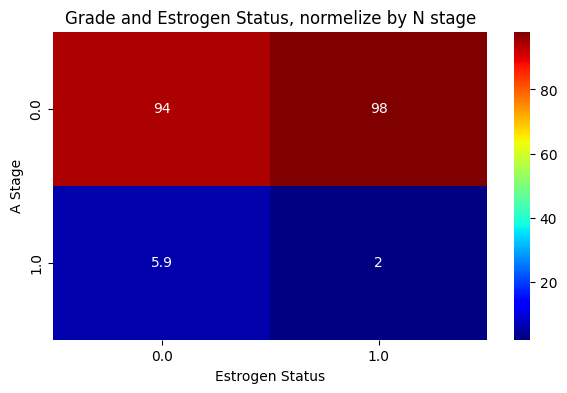

In [44]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(ax=ax, data=df.groupby(['A Stage','Estrogen Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))), cmap='jet',annot=True)
plt.title(label='Grade and Estrogen Status, normelize by N stage', fontsize=12)


Text(0.5, 1.0, 'Grade and Progesterone Status, normelize by N stage')

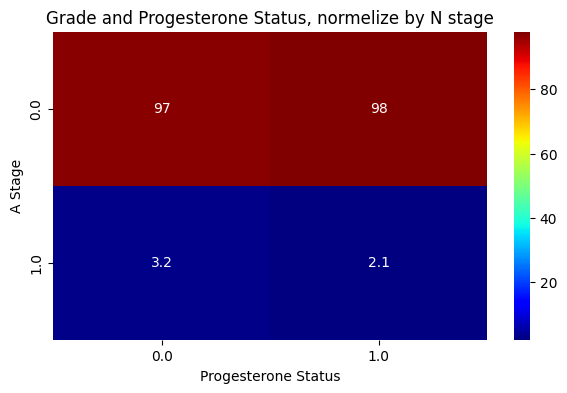

In [45]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(ax=ax, data=df.groupby(['A Stage','Progesterone Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))), cmap='jet',annot=True)
plt.title(label='Grade and Progesterone Status, normelize by N stage', fontsize=12)


In [46]:
df.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Race_Black',
       'Race_Other', 'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed',
       'Regional_Node_pos_%'],
      dtype='object')

## The T Stage

In [47]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.verywellhealth.com%2Fknow-your-breast-tumor-size-4114640&psig=AOvVaw3CmEZglsjej09AADwzD9j6&ust=1684946864738000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCNDHrazyi_8CFQAAAAAdAAAAABAE")

<Axes: >

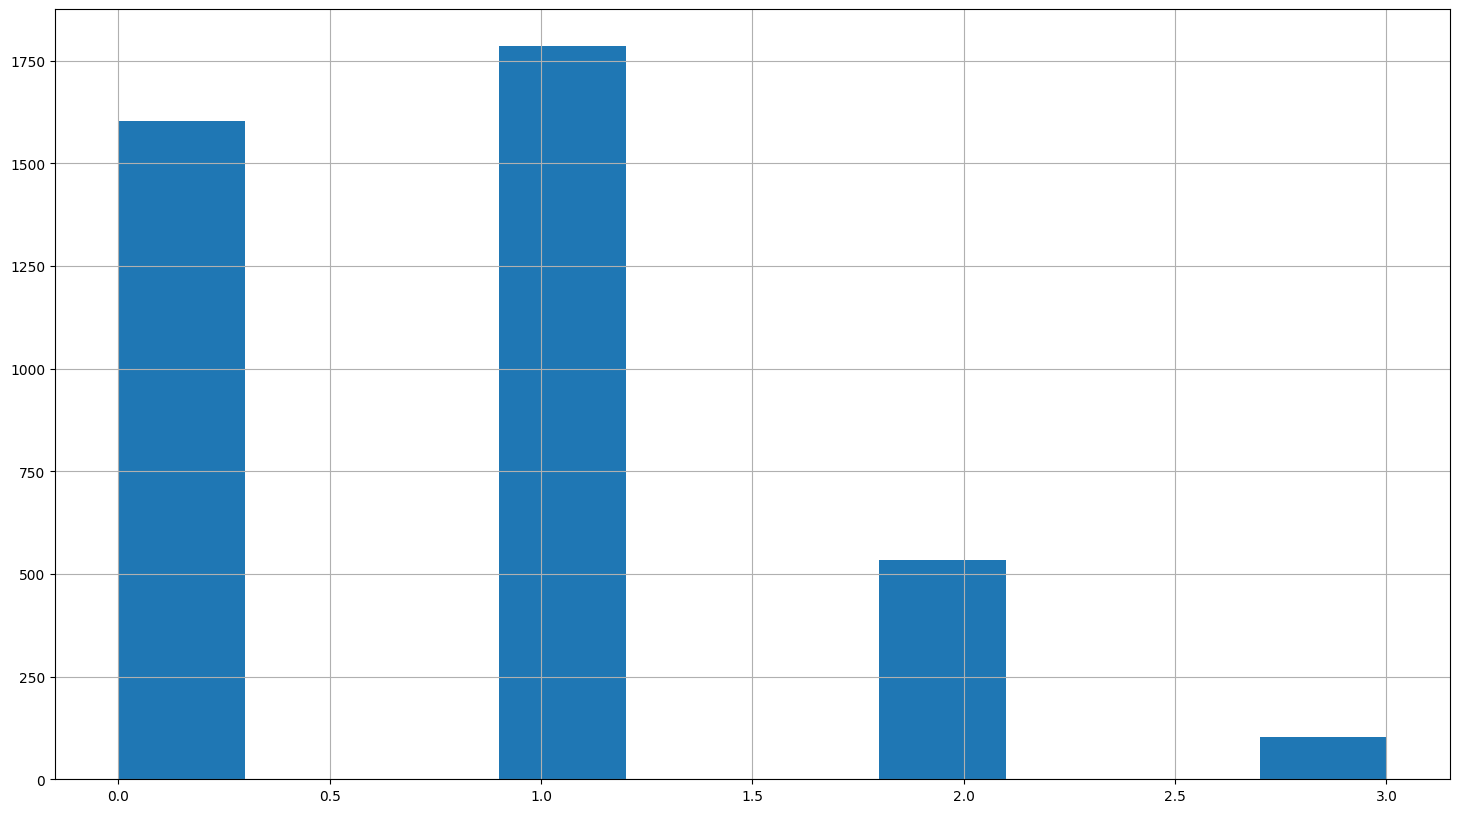

In [48]:
df['T Stage '].hist()

<Axes: >

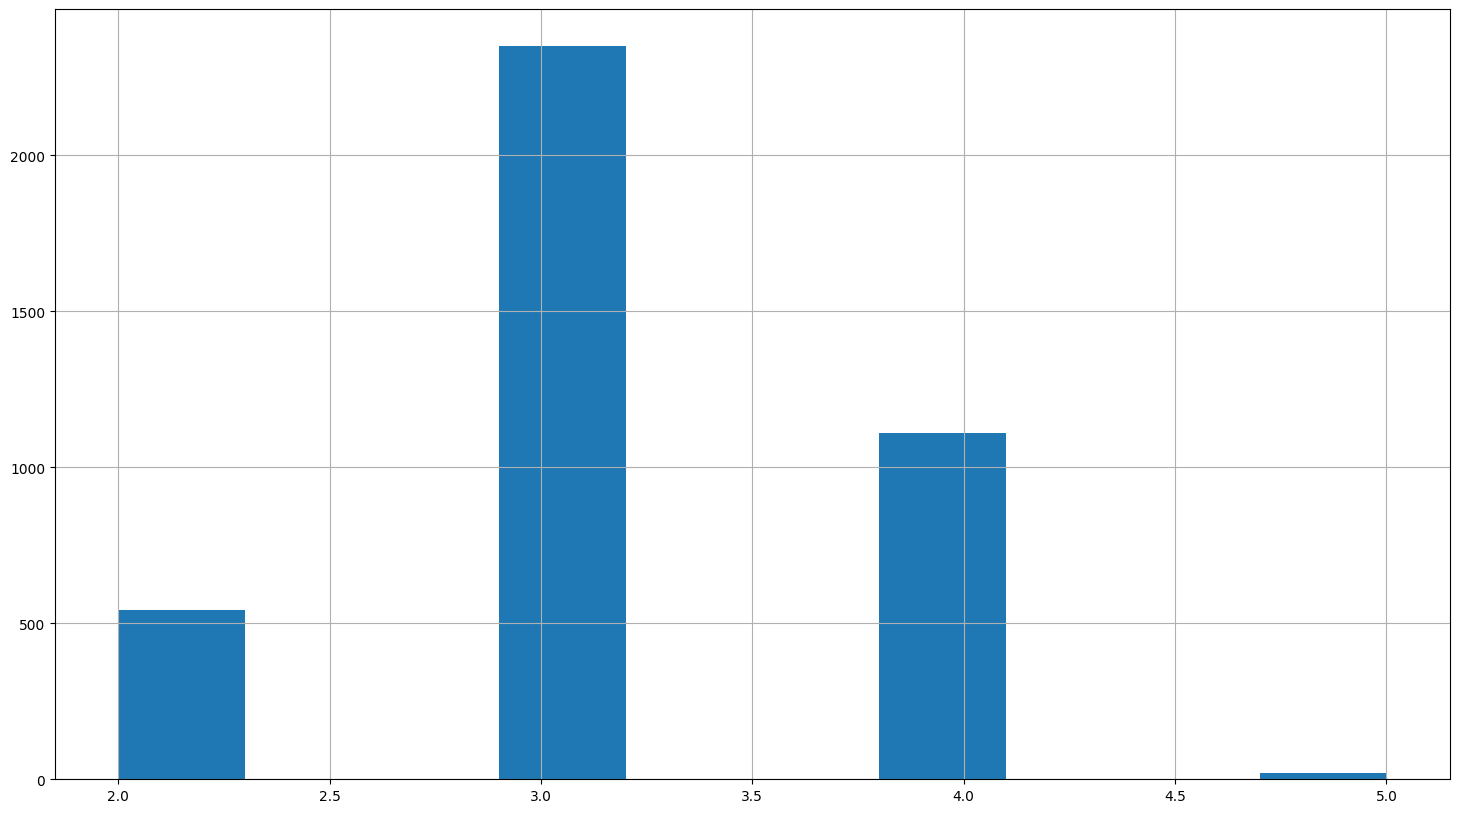

In [49]:
df['Grade'].hist()

<Axes: >

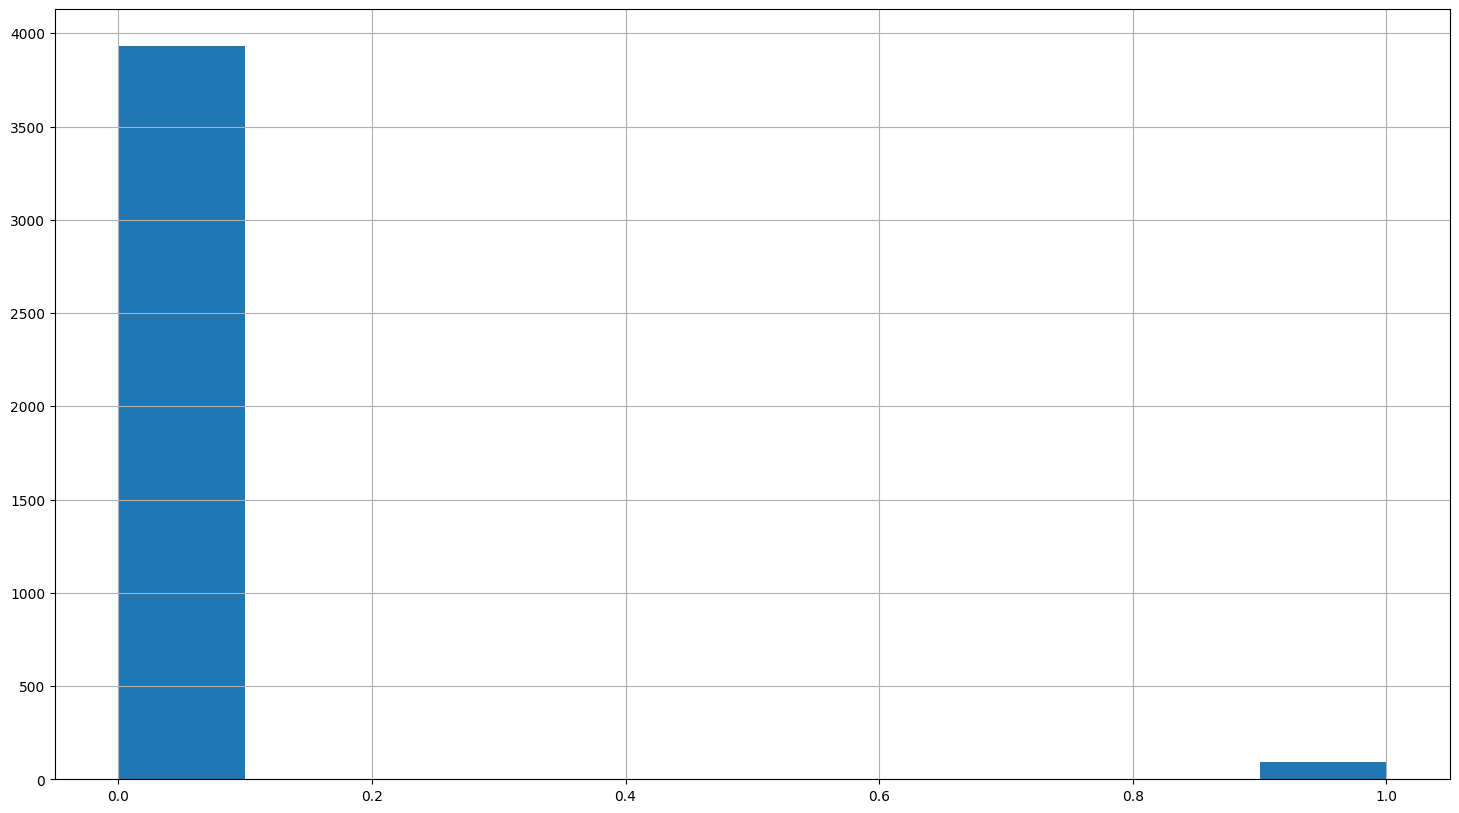

In [50]:
df['A Stage'].hist()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4024 non-null   int64  
 1   T Stage                   4024 non-null   float64
 2   N Stage                   4024 non-null   float64
 3   6th Stage                 4024 non-null   float64
 4   differentiate             4024 non-null   object 
 5   Grade                     4024 non-null   float64
 6   A Stage                   4024 non-null   float64
 7   Tumor Size                4024 non-null   int64  
 8   Estrogen Status           4024 non-null   float64
 9   Progesterone Status       4024 non-null   float64
 10  Regional Node Examined    4024 non-null   int64  
 11  Reginol Node Positive     4024 non-null   int64  
 12  Race_Black                4024 non-null   float64
 13  Race_Other                4024 non-null   float64
 14  Race_Whi

<Axes: >

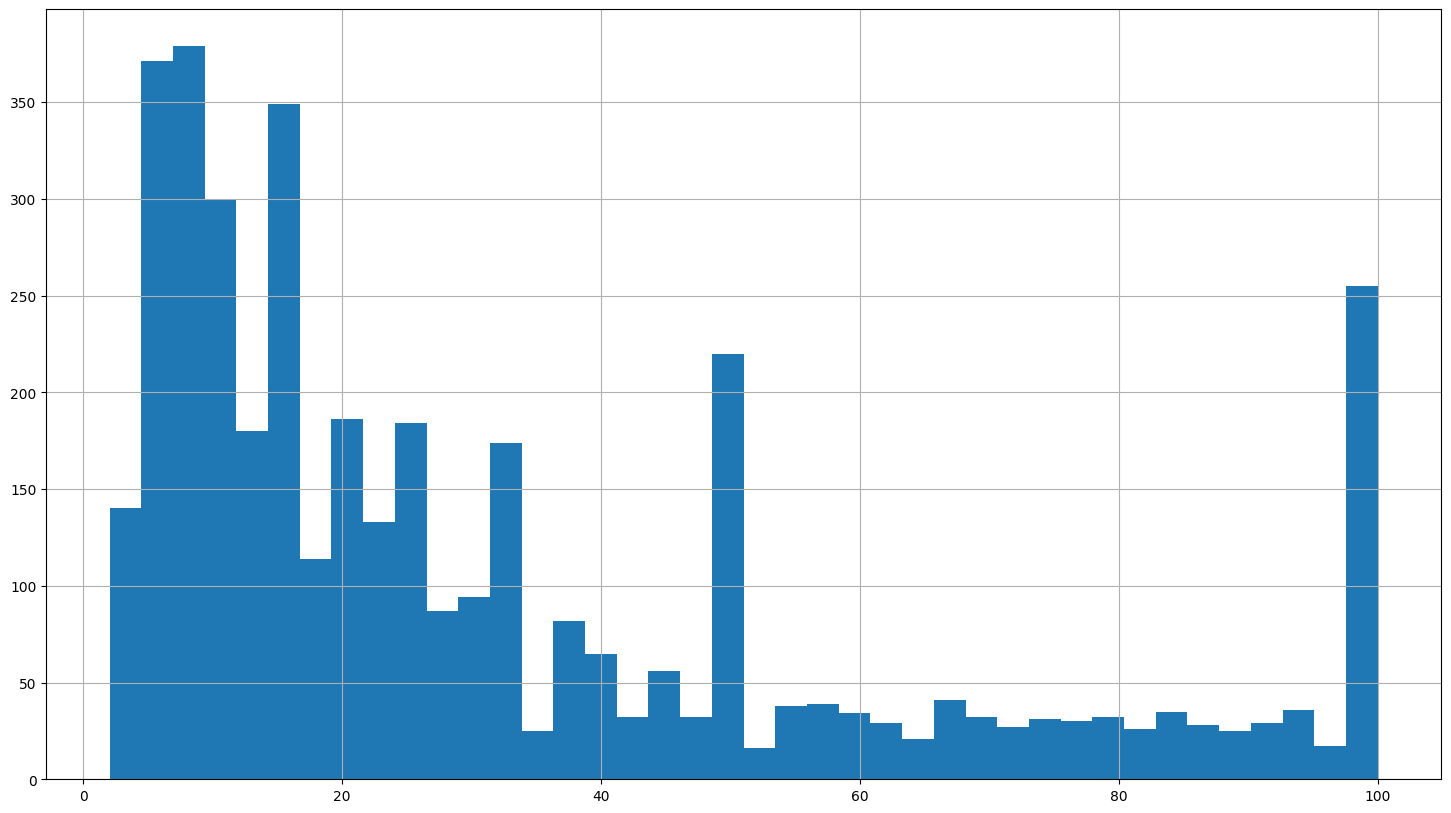

In [52]:
df['Regional_Node_pos_%'].hist(bins=40)

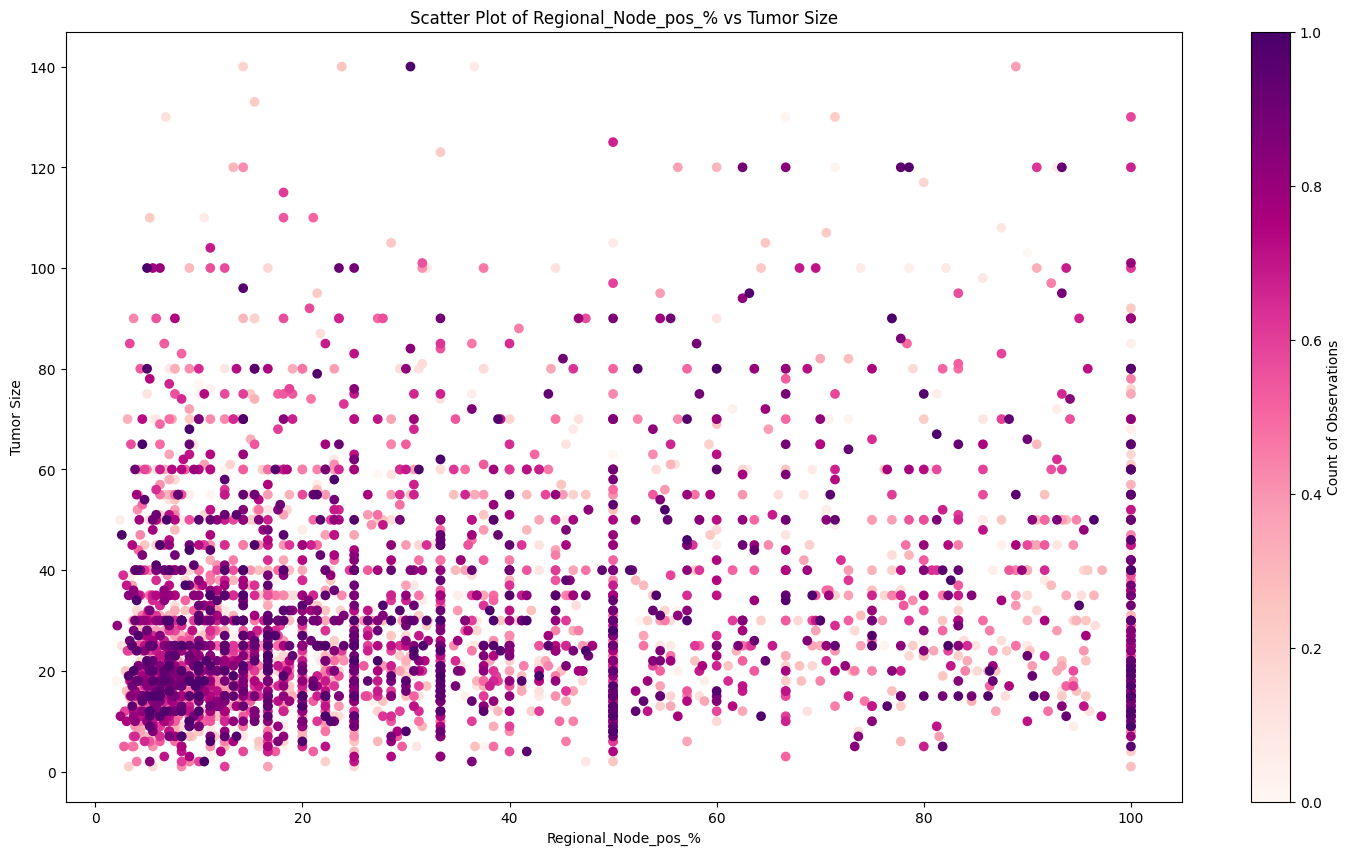

In [67]:
# Select the data for the scatter plot
x = df['Regional_Node_pos_%']
y = df['Tumor Size']

# Define the color palette
colors = np.linspace(0, 1, len(x))  # Generate a range of values from 0 to 1
color_map = plt.cm.get_cmap('RdPu')  # Choose a colormap (RdPu in this case)

# Create the scatter plot with varied colors
plt.scatter(x, y, c=colors, cmap=color_map)

# Set the labels and title
plt.xlabel('Regional_Node_pos_%')
plt.ylabel('Tumor Size')
plt.title('Scatter Plot of Regional_Node_pos_% vs Tumor Size')

# Create a colorbar
cbar = plt.colorbar()
cbar.set_label('Count of Observations')

# Show the plot
plt.show()

In [11]:
df.groupby(["T Stage "])['Tumor Size']

In [12]:
df[["T Stage ",'Tumor Size']]

,T Stage,Tumor Size
0,T1,4
1,T2,35
2,T3,63
3,T1,18
4,T2,41
...,...,...
4019,T1,9
4020,T2,46
4021,T2,22
4022,T2,44


In [7]:
df[['Tumor Size','Grade','A Stage','Age',"T Stage "]].corr()

,Tumor Size,Age
Tumor Size,1.000000,-0.077215
Age,-0.077215,1.000000


In [ ]:
df[['Regional Node Examined','Reginol Node Positive']]

In [ ]:
df['Reginol Node Positive'].hist()

In [ ]:
df['Regional Node Examined'].hist()

שלבים שנשארו:
1. יצירת מידע חדש באמצעות הכלים שלמדנו בשיעור האחרון
2. נרמול הנתונים
3. לחשוב על אפשרות לייצר משתנים חדשים על ידי שילוב משתנים
4. לחשוב על להוסיף מידע מבחוץ (סטטיסטיקות לגבי שילוב משתנים?)
5. ליצור פיפליין
6. לבחור מודלים
7. להריץ את המודלים ואת הפייפליין עם גריד על הפרמטרים של הפייפליין ושל המודלים
8. להכין מצגת 
9. לעשות 2 חזרות על המצגת
10. לבנות כלי לציון מקוסטם

# pipline for A Stage

### code for smote

In [ ]:
!pip install imbalanced-learn

In [ ]:
from numpy import mean
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))